# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
    


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | mont-laurier
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | pokrovsk
Processing Record 13 of Set 1 | horodnya
Processing Record 14 of Set 1 | loango
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | payson
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | bel ombre
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | znamenskoye
Processing Record 21 of Set 1 | baardheere
Processing Record 22 of Set 1 | udachny
Processing Record 23 of Set 1 | kapus

Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | puerto baquerizo moreno
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | ocean shores
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | faya-largeau
Processing Record 48 of Set 4 | palikir - national government center
Processing Record 49 of Set 4 | cabinda
Processing Record 0 of Set 5 | humberto de campos
Processing Record 1 of Set 5 | simrishamn
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | tezu
Processing Record 4 of Set 5 | zapala
Processing Record 5 of Set 5 | manicore
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | kapit
Processing Record 8 of Set 5 | kapa'a
Processing Record 9 of Set 5 | makurazaki
Processing Record 10 of Set 5 | menton
Processing Record 11 of Set 5 | el nido
Processing Record 12 of Set 5 | kyzyl-mazhalyk
Processing Record 13 of Set 5 | mount pearl
Processing Record 14 of Set 5 | 

Processing Record 30 of Set 8 | gao
Processing Record 31 of Set 8 | inhambane
Processing Record 32 of Set 8 | garissa
Processing Record 33 of Set 8 | wankyi
Processing Record 34 of Set 8 | abeche
Processing Record 35 of Set 8 | cafayate
Processing Record 36 of Set 8 | miyako
Processing Record 37 of Set 8 | nago
Processing Record 38 of Set 8 | illela
Processing Record 39 of Set 8 | georgetown
Processing Record 40 of Set 8 | kidal
Processing Record 41 of Set 8 | marudi
City not found. Skipping...
Processing Record 42 of Set 8 | novoishimskiy
Processing Record 43 of Set 8 | limassol
Processing Record 44 of Set 8 | etawa
Processing Record 45 of Set 8 | tralee
Processing Record 46 of Set 8 | acapulco de juarez
Processing Record 47 of Set 8 | silsbee
Processing Record 48 of Set 8 | hualien city
Processing Record 49 of Set 8 | toulepleu guere
Processing Record 0 of Set 9 | guisborough
Processing Record 1 of Set 9 | glace bay
Processing Record 2 of Set 9 | lagoa
Processing Record 3 of Set 9 | 

Processing Record 21 of Set 12 | szczytno
Processing Record 22 of Set 12 | upper dir
Processing Record 23 of Set 12 | junin de los andes
Processing Record 24 of Set 12 | kirakira
Processing Record 25 of Set 12 | phalodi
Processing Record 26 of Set 12 | gaozhou
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | whyalla stuart
City not found. Skipping...
Processing Record 29 of Set 12 | ambodivoara
City not found. Skipping...
Processing Record 30 of Set 12 | santo antonio
Processing Record 31 of Set 12 | mosjoen
Processing Record 32 of Set 12 | swan hill
Processing Record 33 of Set 12 | haci zeynalabdin
Processing Record 34 of Set 12 | birao
Processing Record 35 of Set 12 | ihsaniye
Processing Record 36 of Set 12 | rawson
Processing Record 37 of Set 12 | asau
Processing Record 38 of Set 12 | biasca
Processing Record 39 of Set 12 | katsuura
Processing Record 40 of Set 12 | laascaanood
-----------------------------
Data Retrieval Complete      
---------------------

[{'City': 'anadyr',
  'Lat': 64.75,
  'Lng': 177.4833,
  'Max Temp': 268.43,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 12,
  'Country': 'RU',
  'Date': 1704148172},
 {'City': 'blackmans bay',
  'Lat': -43.0167,
  'Lng': 147.3167,
  'Max Temp': 289.22,
  'Humidity': 85,
  'Cloudiness': 98,
  'Wind Speed': 1.19,
  'Country': 'AU',
  'Date': 1704148090},
 {'City': 'egilsstadir',
  'Lat': 65.2653,
  'Lng': -14.3948,
  'Max Temp': 278.1,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'IS',
  'Date': 1704148105},
 {'City': 'nemuro',
  'Lat': 43.3236,
  'Lng': 145.575,
  'Max Temp': 271.58,
  'Humidity': 71,
  'Cloudiness': 61,
  'Wind Speed': 4.88,
  'Country': 'JP',
  'Date': 1704148646},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 296.16,
  'Humidity': 83,
  'Cloudiness': 100,
  'Wind Speed': 3.57,
  'Country': 'PN',
  'Date': 1704148079},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 274.17,


In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,268.43,93,75,12.00,RU,1704148172
1,blackmans bay,-43.0167,147.3167,289.22,85,98,1.19,AU,1704148090
2,egilsstadir,65.2653,-14.3948,278.10,81,75,5.66,IS,1704148105
3,nemuro,43.3236,145.5750,271.58,71,61,4.88,JP,1704148646
4,adamstown,-25.0660,-130.1015,296.16,83,100,3.57,PN,1704148079


In [60]:
# Convert Max Temp from Kelvin -> Fahrenheit -> Celsius
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 273.15) * 9/5 + 32
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 32) * 5/9
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-4.72,93,75,12.00,RU,1704148172
1,blackmans bay,-43.0167,147.3167,16.07,85,98,1.19,AU,1704148090
2,egilsstadir,65.2653,-14.3948,4.95,81,75,5.66,IS,1704148105
3,nemuro,43.3236,145.5750,-1.57,71,61,4.88,JP,1704148646
4,adamstown,-25.0660,-130.1015,23.01,83,100,3.57,PN,1704148079


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-4.72,93,75,12.00,RU,1704148172
1,blackmans bay,-43.0167,147.3167,16.07,85,98,1.19,AU,1704148090
2,egilsstadir,65.2653,-14.3948,4.95,81,75,5.66,IS,1704148105
3,nemuro,43.3236,145.5750,-1.57,71,61,4.88,JP,1704148646
4,adamstown,-25.0660,-130.1015,23.01,83,100,3.57,PN,1704148079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

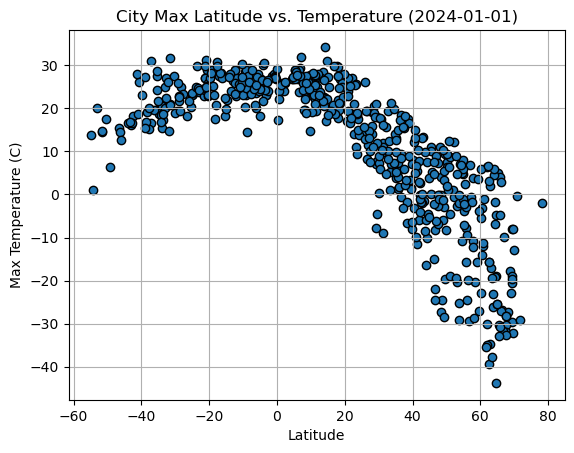

In [69]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(lat,max_temp, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

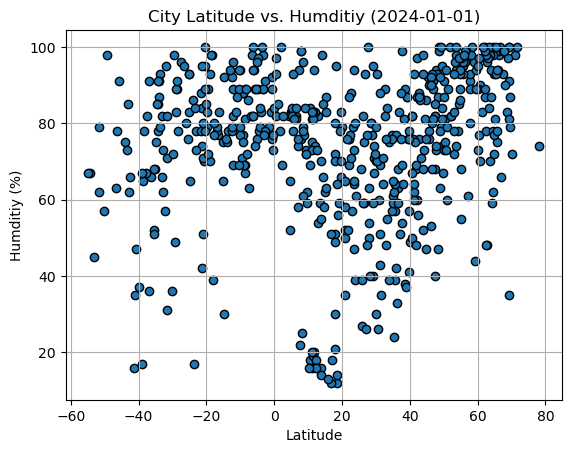

In [76]:
# Build the scatter plots for latitude vs. humidity
humitidy = city_data_df['Humidity']
plt.scatter(lat,humitidy, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humditiy (%)")
plt.title("City Latitude vs. Humditiy (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

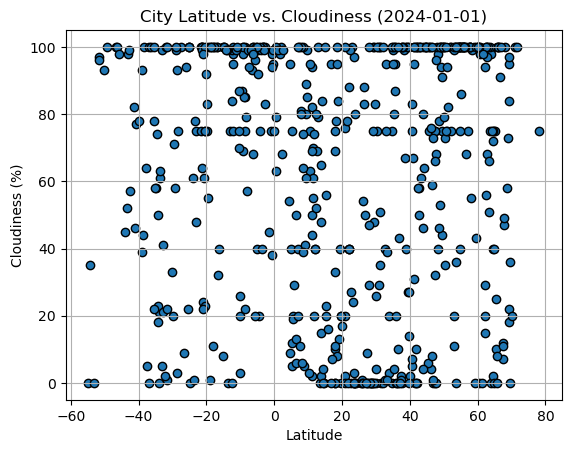

In [75]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(lat,cloudiness, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

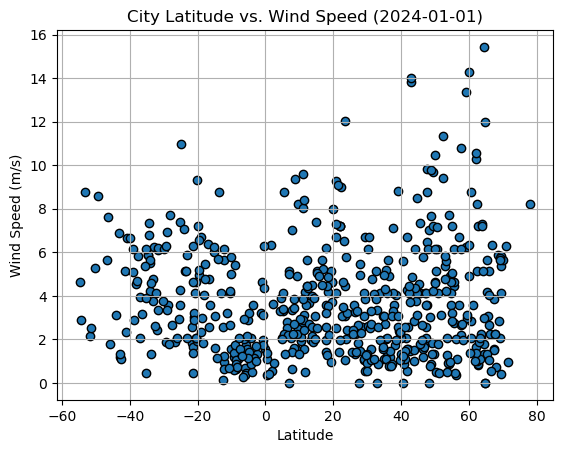

In [74]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(lat,wind_speed, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [194]:
# Define a function to create Linear Regression plots

def regression_analysis(df,x_col,y_col):
    x = df[x_col].values
    y = df[y_col].values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    if df[x_col].min() > 0:
        plt.annotate(line_eq, (35, 15), fontsize=15, color="red")
    else:
        plt.annotate(line_eq, (-40, 11), fontsize=15, color="red")
    print(f"The r-value is : {rvalue**2}")


In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-4.72,93,75,12.00,RU,1704148172
2,egilsstadir,65.2653,-14.3948,4.95,81,75,5.66,IS,1704148105
3,nemuro,43.3236,145.5750,-1.57,71,61,4.88,JP,1704148646
6,mont-laurier,46.5501,-75.4993,-8.21,80,59,1.56,CA,1704148648
8,qaqortoq,60.7167,-46.0333,-12.05,70,98,2.85,GL,1704148151


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,16.07,85,98,1.19,AU,1704148090
4,adamstown,-25.0660,-130.1015,23.01,83,100,3.57,PN,1704148079
5,grytviken,-54.2811,-36.5092,1.02,67,35,2.90,GS,1704148100
7,waitangi,-43.9535,-176.5597,16.57,75,45,3.13,NZ,1704148088
10,touros,-5.1989,-35.4608,27.00,76,40,2.90,BR,1704148651


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7130781370729321


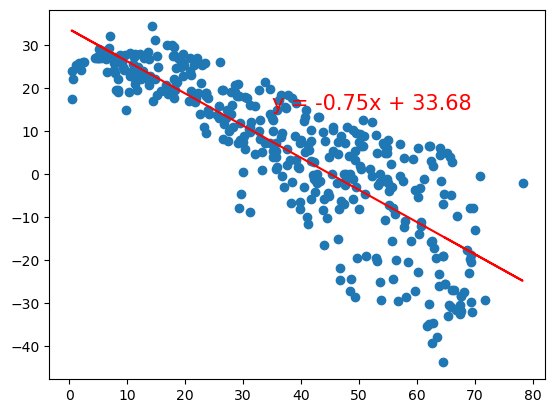

In [195]:
# Linear regression on Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Max Temp')

The r-value is : 0.3639302275008009


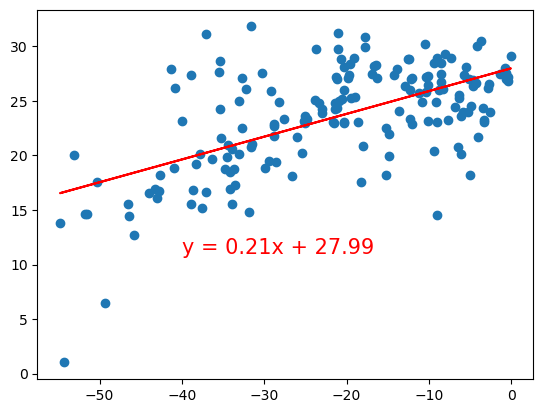

In [196]:
# Linear regression on Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** Between cities in the Northern and Southern hemisphere, as cities move away from the equator the temperatures decrease and as latitude approaches zero, the temperatures increases. There is a stronger linear relationship in the Northern hemisphere dataset due to more cities located in the Northern hemisphere versus the Southern Hemisphere. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.15129763449727943


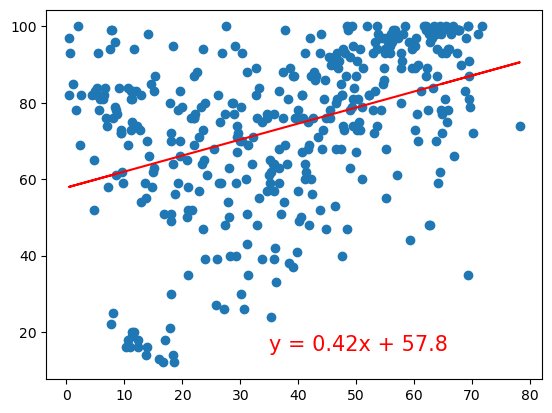

In [197]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Humidity')

The r-value is : 0.13783091954350402


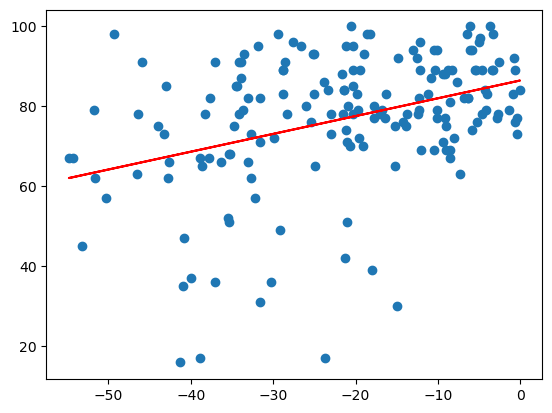

In [198]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** Between both Northern and Southern Hemispheres there is a weak linear correlation between Humidity versus latitude. In the Northern hemisphere, as the latitude increases there is a slight relationship to an increase in humidity. In the Southern Hemisphere, as the city data approaches the equator there is an increase in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.04293622024467534


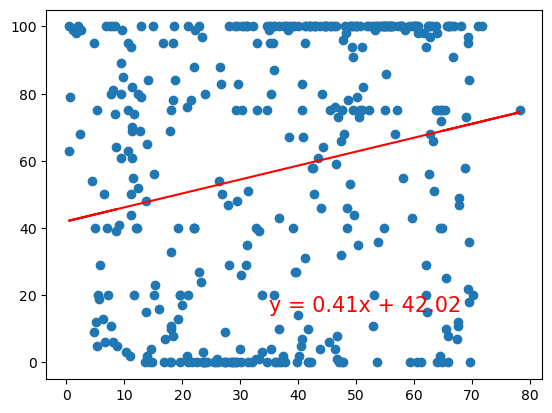

In [199]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Cloudiness')

The r-value is : 0.05008060499901909


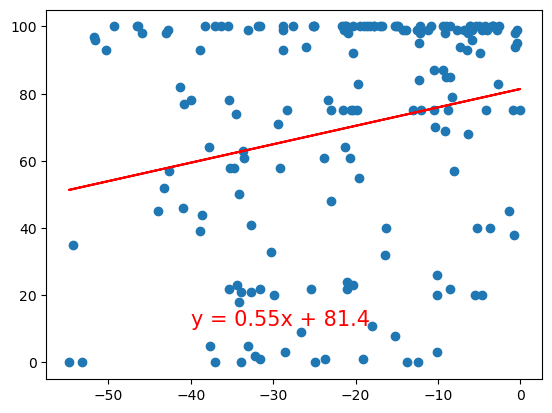

In [200]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere, there is a little to no linear relationship for cloudiness versus latitude increase or decrease. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.009896633663689518


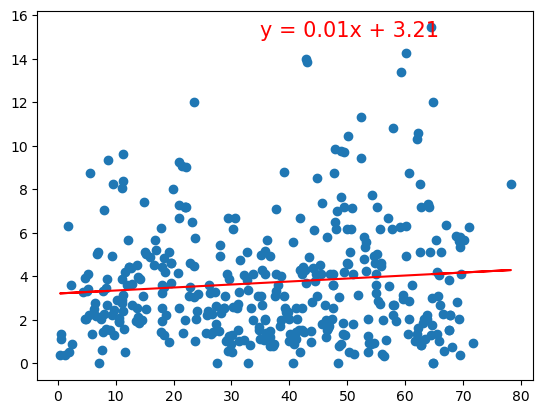

In [201]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Wind Speed')

The r-value is : 0.1640407396988471


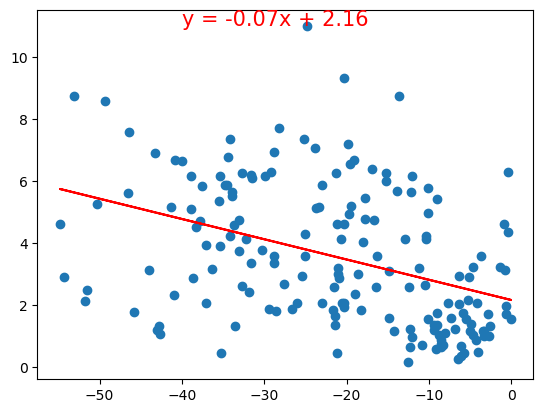

In [202]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** Between Northern and Southern Hemisphere datasets, there is a slight negative relationship in the Southern Hemisphere between Wind Speed and Latitude. As the city data approaches the equator there is a decrease in Wind speeds. In the Northern Hemisphere, the city data set there is little to no relationship between Wind Speed and latitude. The city data infers that weather Wind Speed was overall consistent across latitude increments. 